In [45]:
import jax
import numpy as np
import jax.numpy as jnp

from plotting import Plott_creator
from GD_class import *

## Support functions

In [46]:
def make_design_matrix(x, degree):
    "Creates the design matrix for the given polynomial degree and ijnput data"
    
    X = np.zeros((len(x), degree+1))
    
    for i in range(X.shape[1]):
        X[:,i] = np.power(x, i)
        
    return jnp.array(X)

In [47]:
def cost_function_OLS(X, y, beta):
    n = len(y)  # Define the number of data points
    return (1.0/n) * jnp.sum((y - jnp.dot(X, beta))**2)


def analytical_gradient(X, y, beta):
    n = len(y)
    return (2.0/n)*jnp.dot(X.T, ((jnp.dot(X, beta))-y))

#### Generate Data

In [48]:
np.random.seed(1342)

true_beta = [2, 0.5, 3.2]

n = 1000

x = jnp.linspace(0, 1, n)
y = jnp.sum(jnp.asarray([(x ** p) * b for p, b in enumerate(true_beta)]),
                axis=0) + 0.1 * np.random.normal(size=len(x))

# Making a design matrix to use for linear regression part
degree = 1

X = make_design_matrix(x, degree)


## Run Gradient Descent

In [49]:
np.random.seed(505) # Set seed for reproducibility

# Set parameters
learning_rate = 0.1
tol=1e-3
momentum=0.5
delta= 1e-8
rho1 = 0.9
rho2 = 0.99

grad_descentADAM = GradientDescentADAM(delta, rho1, rho2, X=X, y=y, 
                                       learning_rate=learning_rate, tol=tol, 
                                       cost_function=cost_function_OLS,
                                       analytic_gradient=analytical_gradient,
                                       record_history=True)

grad_descentADAM_stoc = GradientDescentADAM(delta, rho1, rho2, X=X, y=y, 
                                            learning_rate=learning_rate, tol=tol, 
                                            cost_function=cost_function_OLS,
                                            analytic_gradient=analytical_gradient,
                                            skip_convergence_check=True,
                                            record_history=True)
max_iter = 100000
max_epochs = 10

grad_descentADAM.iterate(iteration_method="Full", 
                         max_iter=max_iter)

grad_descentADAM_stoc.iterate(iteration_method="Stochastic", 
                              max_epoch=max_epochs,
                              num_batches=100)

Converged after 193 iterations


Array([1.4982816, 3.7094345], dtype=float32)

In [50]:
np.random.seed(505) # Set seed for reproducibility

# Set parameters
learning_rate = 0.1
tol=1e-3
momentum=0.5
delta= 1e-8
rho1 = 0.9
rho2 = 0.99

grad_descentAdagrad = GradientDescentAdagrad(delta, rho1, X=X, y=y, 
                                       learning_rate=learning_rate, tol=tol, 
                                       cost_function=cost_function_OLS,
                                       analytic_gradient=analytical_gradient,
                                       record_history=True)

grad_descentAdagrad_stoc = GradientDescentAdagrad(delta, rho1, X=X, y=y, 
                                            learning_rate=learning_rate, tol=tol, 
                                            cost_function=cost_function_OLS,
                                            analytic_gradient=analytical_gradient,
                                            skip_convergence_check=True,
                                            record_history=True)
max_iter = 100000
max_epochs = 10

grad_descentADAM.iterate(iteration_method="Full", 
                         max_iter=max_iter)

grad_descentADAM_stoc.iterate(iteration_method="Stochastic", 
                              max_epoch=max_epochs,
                              num_batches=100)

Converged after 210 iterations


Array([1.49827 , 3.709435], dtype=float32)

## Plotting the gradient descent

In [51]:
betas_adam_plain = grad_descentADAM.betas
y_preds_adam_plain = [X @ beta for beta in betas_adam_plain]
betas_adam_stoc = grad_descentADAM_stoc.betas
y_preds_adam_stoc = [X @ beta for beta in betas_adam_stoc]


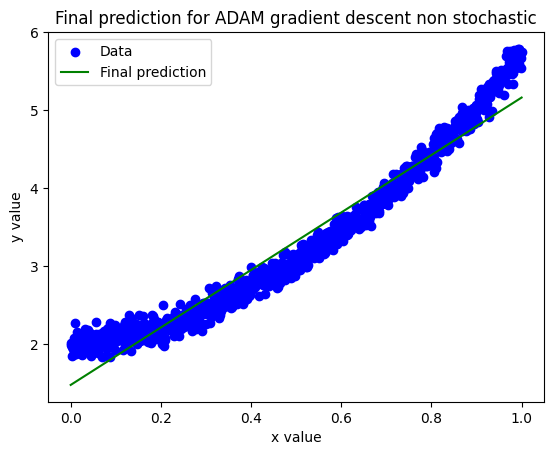

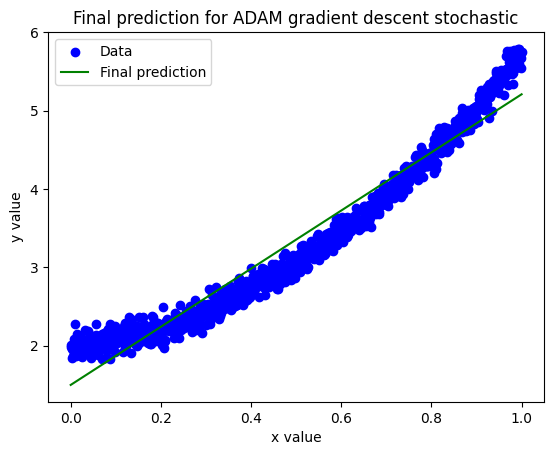

In [52]:
plotter = Plott_creator()
plotter.plot_regression(x, y, y_preds_adam_plain, 'Final prediction for ADAM gradient descent non stochastic', save_fig=True)
plotter.plot_regression(x, y, y_preds_adam_stoc, 'Final prediction for ADAM gradient descent stochastic', save_fig=True) 

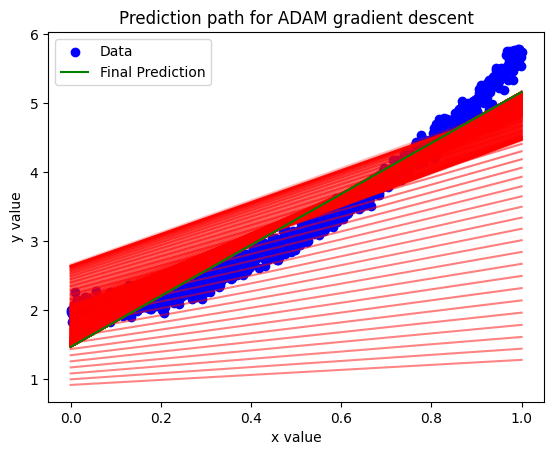

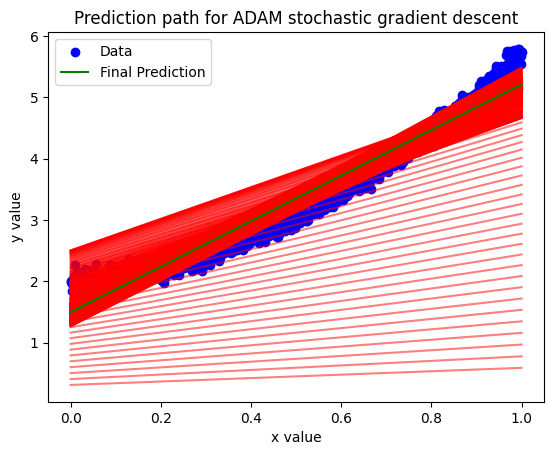

In [53]:
plotter.plot_regression(x, y, y_preds_adam_plain, 'Prediction path for ADAM gradient descent',
                        show_history=True)
plotter.plot_regression(x, y, y_preds_adam_stoc, 'Prediction path for ADAM stochastic gradient descent',
                        show_history=True)

## Plotting the cost function history

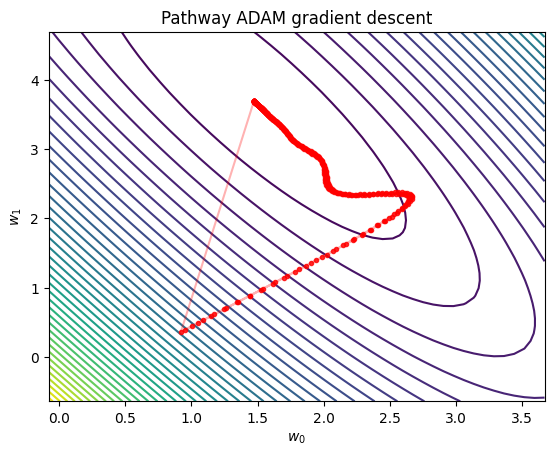

In [56]:
plotter.plot_path_weights(cost_function_OLS, X, y, grad_descentADAM.betas,  
                          'Pathway ADAM gradient descent')

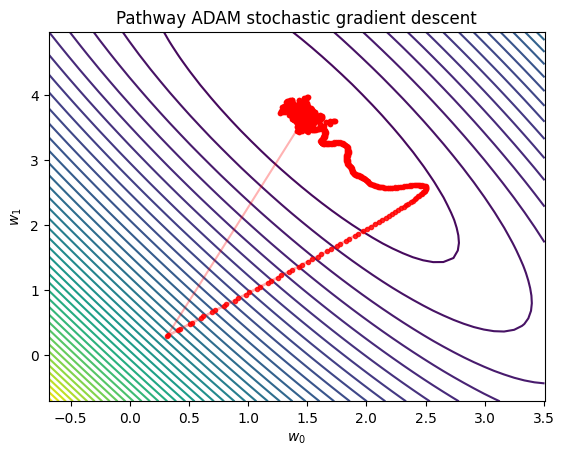

In [57]:
plotter.plot_path_weights(cost_function_OLS, X, y, grad_descentADAM_stoc.betas,  
                          'Pathway ADAM stochastic gradient descent')